In [1]:
import numpy as np 
from pandas_datareader import data as wb
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm

In [2]:
ticker = 'GLD'

In [3]:
dataa = pd.DataFrame()

In [4]:
dataa[ticker] = wb.DataReader(ticker , data_source = 'yahoo' , start = '2010-1-1')['Adj Close']

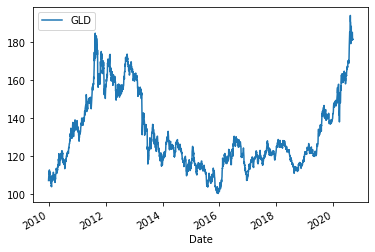

In [5]:
dataa.plot()

In [6]:
dataa.head()

,GLD
Date,
2009-12-31,107.309998
2010-01-04,109.800003
2010-01-05,109.699997
2010-01-06,111.510002
2010-01-07,110.820000


In [7]:
dataa.tail()

,GLD
Date,
2020-09-01,185.050003
2020-09-02,182.619995
2020-09-03,181.139999
2020-09-04,181.639999
2020-09-08,181.289993


In [8]:
log_return = np.log(1 + dataa.pct_change())
log_return.tail()

,GLD
Date,
2020-09-01,0.001190
2020-09-02,-0.013219
2020-09-03,-0.008137
2020-09-04,0.002756
2020-09-08,-0.001929


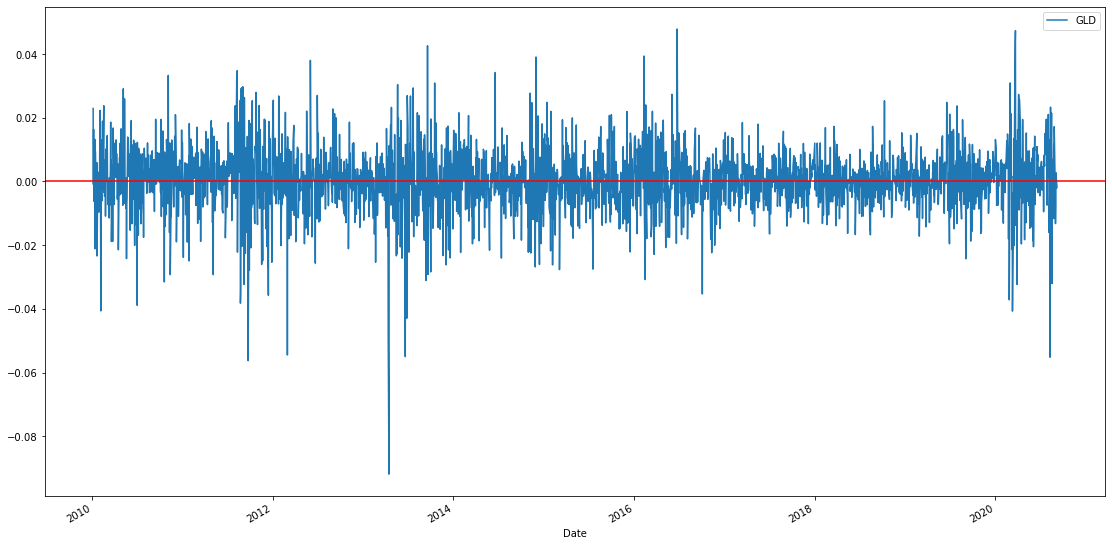

In [9]:
log_return.plot(figsize = (19,10))
plt.axhline(0,color = 'r')

In [10]:
u = log_return.mean()
u

GLD    0.000195
dtype: float64

In [11]:
var = log_return.var()
var

GLD    0.000101
dtype: float64

In [12]:
stdev = log_return.std()
stdev

GLD    0.010045
dtype: float64

In [13]:
drift = u - (0.5*var)
drift

GLD    0.000145
dtype: float64

In [14]:
drift.values

array([0.00014455])

In [15]:
stdev.values

array([0.01004533])

In [16]:
t_interval = 1000
iterations = 10
daily_returns = np.exp(drift.values + stdev.values*norm.ppf(np.random.rand(t_interval, iterations)))

In [17]:
daily_returns

array([[0.99143277, 1.00960168, 0.98556681, ..., 0.99337676, 1.0237605 ,
        0.99290221],
       [0.99500699, 0.98490143, 0.98647757, ..., 0.99601261, 0.98602032,
        0.97143598],
       [0.99442772, 1.00603066, 0.98776626, ..., 0.98882545, 1.00343272,
        1.00046803],
       ...,
       [1.00567643, 1.00996869, 0.98951112, ..., 0.99423935, 0.99499556,
        1.00221938],
       [0.99173542, 1.00632945, 0.99978937, ..., 0.99318746, 1.00662174,
        1.01501723],
       [1.01325089, 0.99351938, 1.00633669, ..., 1.00019819, 0.99111827,
        0.99256074]])

In [18]:
so = dataa.iloc[-1]
so

GLD    181.289993
Name: 2020-09-08 00:00:00, dtype: float64

In [19]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
price_list[0] = so

In [21]:
price_list

array([[181.28999329, 181.28999329, 181.28999329, ..., 181.28999329,
        181.28999329, 181.28999329],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [22]:
for t in range(1, t_interval):
    price_list[t] = price_list[t-1]*daily_returns[t]
price_list

array([[181.28999329, 181.28999329, 181.28999329, ..., 181.28999329,
        181.28999329, 181.28999329],
       [180.38480999, 178.5527736 , 178.83851151, ..., 180.56711953,
        178.75561675, 176.1116216 ],
       [179.37965508, 179.62956426, 176.6506485 , ..., 178.54936394,
        179.36923526, 176.19404718],
       ...,
       [175.74004737, 200.853618  , 182.16336296, ..., 201.97462159,
        267.42953336, 174.63463964],
       [174.28763018, 202.12491066, 182.12499453, ..., 200.59866205,
        269.20038163, 177.2571689 ],
       [176.5970962 , 200.81501521, 183.27906403, ..., 200.63841779,
        266.80941525, 175.93850674]])

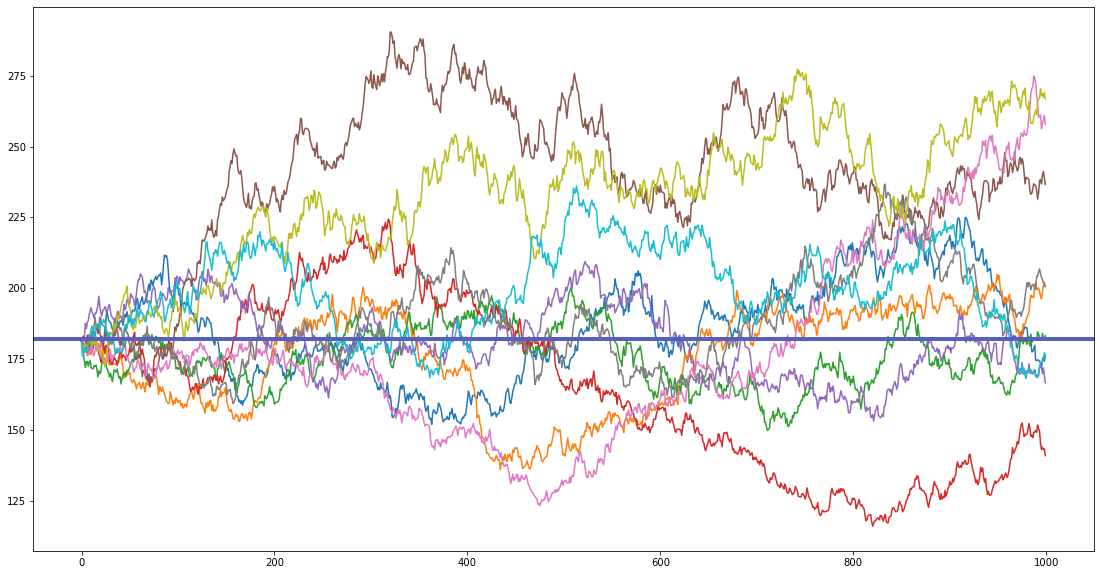

In [23]:
plt.figure(figsize = (19,10))
plt.plot(price_list  , alpha = 2)
plt.axhline(182.18 , color = '#565EBF', linewidth = 4 ,alpha = 1)
plt.savefig('vishwa_gold3.png')
#plt.axis('off')
plt.show()